In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
#loading House_Data

df_base = pd.read_csv('kc_house_data.csv')
df_base.reset_index()
df_base.head(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df_base ['price_per_sqft_living'] = round(df_base ['price'] / df_base ['bedrooms'])
df_base['renovation'] = np.where(df_base['yr_renovated']>0, 'Yes', 'No')



In [5]:
df_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,73967.0,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,179333.0,Yes
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,90000.0,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,151000.0,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,170000.0,No


In [6]:
#Removing Nulls in the dataset -> method used is to replace them with 0 -> Not final approach 

df_base = df_base.fillna(method = 'ffill')
df_base.isna().sum()


id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               1
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
price_per_sqft_living    0
renovation               0
dtype: int64

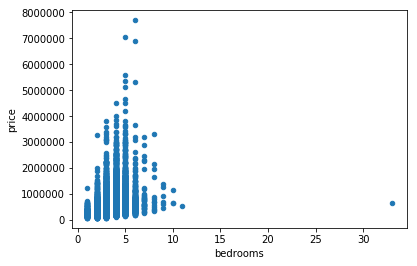

In [7]:
#Sorting by bedroom - identify outlier
df_base = df_base.sort_values('bedrooms', ascending = False)

#plotting bedrooms by Price 
df_base.plot(kind = 'scatter', x ='bedrooms', y = 'price')


In [8]:
#Drop bedroom outlier with 33 rooms 

df_base.drop(df_base.loc[df_base['bedrooms']== 33].index)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovation
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,47273.0,Yes
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,115000.0,No
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,66000.0,No
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,65000.0,No
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000,142222.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/2014,238000.0,1,1.00,530,6350,1.0,0.0,0.0,...,0.0,1941,0.0,98103,47.6946,-122.357,1200,6350,238000.0,No
13316,4356200120,10/23/2014,248000.0,1,1.00,790,12000,1.0,0.0,0.0,...,0.0,1918,0.0,98118,47.5146,-122.265,1900,6000,248000.0,No
7010,203100460,9/24/2014,400000.0,1,1.00,530,13679,1.0,0.0,0.0,...,0.0,1949,0.0,98053,47.6422,-121.954,1930,20624,400000.0,No
3578,1925069006,12/3/2014,355000.0,1,0.75,530,33278,1.0,0.0,2.0,...,0.0,1950,0.0,98074,47.6412,-122.079,2830,14311,355000.0,No


In [9]:
#Added price per sqft column and renovation check column

df_base ['price_per_sqft_living'] = round(df_base ['price'] / df_base ['bedrooms'])
df_base['renovation'] = np.where(df_base['yr_renovated']>0, 'Yes', 'No')

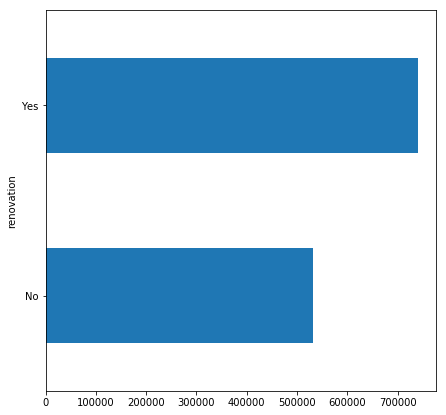

In [10]:
#Check renovation impact on Price 

df_base.groupby('renovation')['price'].mean().plot(kind = 'barh', x = 'price', figsize = (7,7))

In [11]:
#Setting up variables for statistical analysis 

X = df_base ['sqft_living']
Y = df_base ['price']

In [12]:
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(Y,X)

#Learning
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.49
const         -43988.8922
sqft_living      280.8630
dtype: float64


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        09:08:36   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_base_2 = df_base.drop(['id','yr_built', 'yr_renovated','zipcode', 'lat','long','bathrooms'], axis = 1)
corr1 = df_base_2.corr().round(2)
corr1.sort_values('grade', ascending = False)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,price_per_sqft_living
grade,0.67,0.36,0.76,0.11,0.46,0.08,0.25,-0.15,1.00,0.76,0.71,0.12,0.51
sqft_living,0.70,0.58,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.76,0.18,0.44
sqft_above,0.61,0.48,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,0.73,0.20,0.38
sqft_living15,0.59,0.39,0.76,0.14,0.28,0.08,0.28,-0.09,0.71,0.73,1.00,0.18,0.42
price,1.00,0.31,0.70,0.09,0.26,0.26,0.39,0.04,0.67,0.61,0.59,0.08,0.85
price_per_sqft_living,0.85,-0.13,0.44,0.08,0.18,0.28,0.38,0.03,0.51,0.38,0.42,0.07,1.00
floors,0.26,0.18,0.35,-0.00,1.00,0.03,0.03,-0.26,0.46,0.52,0.28,-0.01,0.18
bedrooms,0.31,1.00,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.39,0.03,-0.13
view,0.39,0.08,0.28,0.07,0.03,0.37,1.00,0.05,0.25,0.17,0.28,0.07,0.38
sqft_lot15,0.08,0.03,0.18,0.72,-0.01,0.03,0.07,-0.00,0.12,0.20,0.18,1.00,0.07


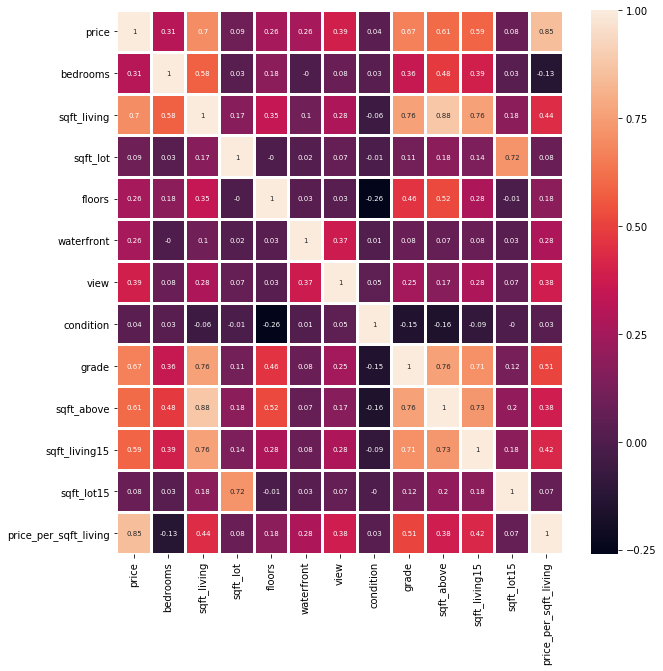

In [15]:
#Updated & Simplified correlation heatmap

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = corr1, annot = True, annot_kws = {"size": 7}, linewidth = 2)


In [18]:
df_base_2.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,price_per_sqft_living
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21596.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,5.402966e+05,3.373200,2080.321850,1.509941e+04,1.494096,0.007316,0.234384,3.409825,7.657915,1788.596842,1986.620318,12758.283512,1.636313e+05
std,3.673681e+05,0.926299,918.106125,4.141264e+04,0.539683,0.085223,0.766422,0.650546,1.173200,827.759761,685.230472,27274.441950,9.849806e+04
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,399.000000,651.000000,1.939400e+04
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1490.000000,5100.000000,9.966700e+04
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1840.000000,7620.000000,1.420000e+05
75%,6.450000e+05,4.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,2360.000000,10083.000000,1.983330e+05
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,6210.000000,871200.000000,1.640000e+06
